# Importe de librerias

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv("../data/CDGBvideos_cc50_202101.csv")

In [3]:
data.dtypes

video_id                   object
trending_date              object
title                      object
channel_title              object
publish_time               object
tags                       object
views                       int64
likes                       int64
dislikes                    int64
comment_count               int64
thumbnail_link             object
comments_disabled            bool
ratings_disabled             bool
video_error_or_removed       bool
description                object
state                      object
lat                       float64
lon                       float64
geometry                   object
CategoryTitle              object
PercentageLikes           float64
PercentageDislikes        float64
dtype: object

In [4]:
data['publish_time'] = pd.to_datetime(data['publish_time'])
data["trending_date"] = pd.to_datetime(data["trending_date"])

In [5]:
data.dtypes

video_id                               object
trending_date                  datetime64[ns]
title                                  object
channel_title                          object
publish_time              datetime64[ns, UTC]
tags                                   object
views                                   int64
likes                                   int64
dislikes                                int64
comment_count                           int64
thumbnail_link                         object
comments_disabled                        bool
ratings_disabled                         bool
video_error_or_removed                   bool
description                            object
state                                  object
lat                                   float64
lon                                   float64
geometry                               object
CategoryTitle                          object
PercentageLikes                       float64
PercentageDislikes                

In [6]:
data.head()

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,...,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry,CategoryTitle,PercentageLikes,PercentageDislikes
0,zxwfDlhJIpw,2018-06-06,kanye west / charlamagne interview,Kanye West,2018-05-01 15:57:06+00:00,"Kanye West|""YEEZY""|""Kanye""|""Charlamagne""|""The ...",8626957,168370,19694,48689,...,False,False,NaN,Derry,55.000375,-7.333284,POINT (-7.333283937 55.00037539),People & Blogs,89.53,10.47
1,zxwfDlhJIpw,2018-06-05,kanye west / charlamagne interview,Kanye West,2018-05-01 15:57:06+00:00,"Kanye West|""YEEZY""|""Kanye""|""Charlamagne""|""The ...",8610062,168184,19664,48649,...,False,False,NaN,Westminster,51.499995,-0.116722,POINT (-0.116721844 51.49999473),People & Blogs,89.53,10.47
2,zxwfDlhJIpw,2018-06-04,kanye west / charlamagne interview,Kanye West,2018-05-01 15:57:06+00:00,"Kanye West|""YEEZY""|""Kanye""|""Charlamagne""|""The ...",8596449,168026,19640,48633,...,False,False,NaN,Nottingham,52.970344,-1.170017,POINT (-1.170016725 52.97034426),People & Blogs,89.53,10.47
3,zxwfDlhJIpw,2018-06-03,kanye west / charlamagne interview,Kanye West,2018-05-01 15:57:06+00:00,"Kanye West|""YEEZY""|""Kanye""|""Charlamagne""|""The ...",8579665,167841,19615,48621,...,False,False,NaN,Stoke On Trent,53.000368,-2.180007,POINT (-2.180006756 53.00036826),People & Blogs,89.54,10.46
4,zxwfDlhJIpw,2018-06-02,kanye west / charlamagne interview,Kanye West,2018-05-01 15:57:06+00:00,"Kanye West|""YEEZY""|""Kanye""|""Charlamagne""|""The ...",8561990,167664,19596,48580,...,False,False,NaN,Moray,58.966981,-2.950011,POINT (-2.950011435 58.96698081),People & Blogs,89.54,10.46


In [7]:
videoId = data["video_id"].unique().tolist()
videoId

['zxwfDlhJIpw',
 'zxjv0lo8bU8',
 'zxGg8QqWrRQ',
 'zwrlJwed2mQ',
 'zwEn-ambXLw',
 'zw6hMTAtdwg',
 'zvb2kBii-OU',
 'zslYmBRhdOM',
 'zpgn8U5Ug8M',
 'zorKvDiLbxw',
 'zmcGIBpgG-Y',
 'zlAqizx7Lf0',
 'zkNzxsaCunU',
 'zkG4Xpz6t68',
 'zi_6oaQyckM',
 'ziLWPlVN0MM',
 'zhbjf49Lv9o',
 'zcJ8BTAGqE0',
 'zbyu6MOzpLE',
 'zbGSbZXzvqw',
 'za_7j4vSRyA',
 'zaPsZVFAzH0',
 'za0qXbofvc0',
 'zXV4Sgeyr2c',
 'zXHUHx4R9kI',
 'zX1_qEVop0Q',
 'zX0AV6yxyrQ',
 'zVc-K1kKkVk',
 'zVVrfqwA5lQ',
 'zUrDUxh5xS0',
 'zUofr5WcdSM',
 'zUelEgXDHa8',
 'zUDcGDK_bRw',
 'zTIoErJmsp4',
 'zT7VEhfezn8',
 'zQYarS9LYgk',
 'zNs3AQOVeVs',
 'zN_DJ3c2N28',
 'zMV51hydg8E',
 'zMLfhTnyPVs',
 'zLDR4HJfheA',
 'zGN8ghHMaKw',
 'zEf423kYfqk',
 'zCot9TDoA-M',
 'zB1pY4n_FyQ',
 'z85JsxyICg8',
 'z7VBtM7clT4',
 'z5WrgDzNIZ0',
 'z4dH6hEMuwk',
 'z4bLKt9k5dk',
 'z2GvJtzn41E',
 'z14A0Vblm0I',
 'z0iTGgVhPKE',
 'yzshoDMBkqE',
 'yzl_ZKQExnk',
 'yzJtC835sio',
 'yzGmnjDFuZE',
 'yyROtEW9Jdc',
 'yxfZBun1uBU',
 'yvYeAdcM2Ss',
 'ys2x8oOK7wE',
 'yqulWPljawo',
 'yqFIrr

# Por categoria de videos

In [8]:
listVideoId = data.drop_duplicates(subset=["video_id"], keep="first").reset_index(drop=True)
listVideoId.head()

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,...,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry,CategoryTitle,PercentageLikes,PercentageDislikes
0,zxwfDlhJIpw,2018-06-06,kanye west / charlamagne interview,Kanye West,2018-05-01 15:57:06+00:00,"Kanye West|""YEEZY""|""Kanye""|""Charlamagne""|""The ...",8626957,168370,19694,48689,...,False,False,NaN,Derry,55.000375,-7.333284,POINT (-7.333283937 55.00037539),People & Blogs,89.53,10.47
1,zxjv0lo8bU8,2018-06-09,MARCELO's son ENZO shows off his skills in the...,Real Madrid,2018-05-16 13:03:18+00:00,"Real Madrid C.F.|""Real Madrid""|""Real madrid ci...",275408,9697,107,564,...,False,False,"Watch how Marcelo's son, Enzo, plays with the ...",Perthshire And Kinross,56.400342,-3.469980,POINT (-3.469979697 56.40034161),Sports,98.91,1.09
2,zxGg8QqWrRQ,2017-12-18,"K Michelle on Boyfriend Kastan Sims, Having T...",ESSENCE,2017-12-06 19:37:48+00:00,"Essence|""essence live""|""Essence Now""|""Dr. Kast...",124057,1981,98,347,...,False,False,K. Michelle drops by ESSENCE Now to dish on he...,South Ayrshire,55.450400,-4.616680,POINT (-4.61667973 55.4503996),Entertainment,95.29,4.71
3,zwrlJwed2mQ,2017-12-30,BigCityBeats WORLD CLUB DOME Zero Gravity (Off...,BigCityBeats,2017-12-13 13:58:13+00:00,"BigCityBeats|""Zero Gravity""|""Flugzeug""|""Airpla...",107312,763,3,26,...,False,False,BigCityBeats presents ‘WORLD CLUB DOME Zero Gr...,Edinburgh,55.948328,-3.219091,POINT (-3.219090618 55.94832786),Entertainment,99.61,0.39
4,zwEn-ambXLw,2018-04-07,This Is Me - Cover by Shoshana Bean Featuring ...,Shoshana Bean,2018-03-22 08:30:07+00:00,"travis wall|""shoshana bean""|""greatest showman""...",246809,8626,146,328,...,False,False,I was lucky enough to lay the original demo fo...,Dungannon,54.520379,-6.670017,POINT (-6.670016929 54.52037884),Music,98.34,1.66


## Pregunta 1
## ¿Qué categorías de videos son las de mayor tendencia?

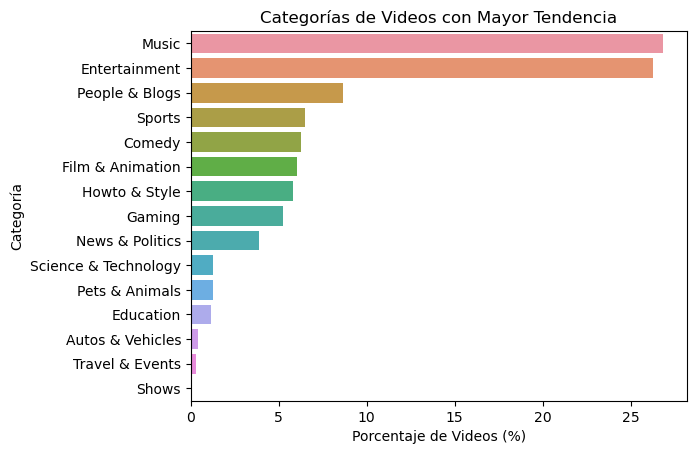

In [18]:
categoria_tendencias = listVideoId['CategoryTitle'].value_counts()
categoria_porcentajes = (categoria_tendencias / len(listVideoId)) * 100

sns.barplot(x=categoria_porcentajes.values, y=categoria_tendencias.index)
plt.title('Categorías de Videos con Mayor Tendencia')
plt.xlabel('Porcentaje de Videos (%)')
plt.ylabel('Categoría')
plt.show()

## Pregunta 2
## ¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?

<BarContainer object of 15 artists>

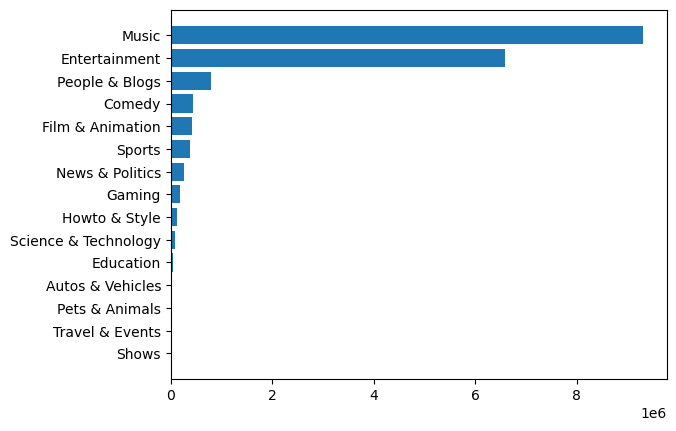

In [10]:
dislikedCategory = (
    listVideoId[["CategoryTitle", "dislikes", "video_id"]]
    .groupby("CategoryTitle")[["dislikes"]]
    .sum()
    .reset_index()
)
dislikedCategory.sort_values("dislikes", ascending=True, inplace=True)
plt.barh(dislikedCategory["CategoryTitle"], dislikedCategory["dislikes"])

<BarContainer object of 15 artists>

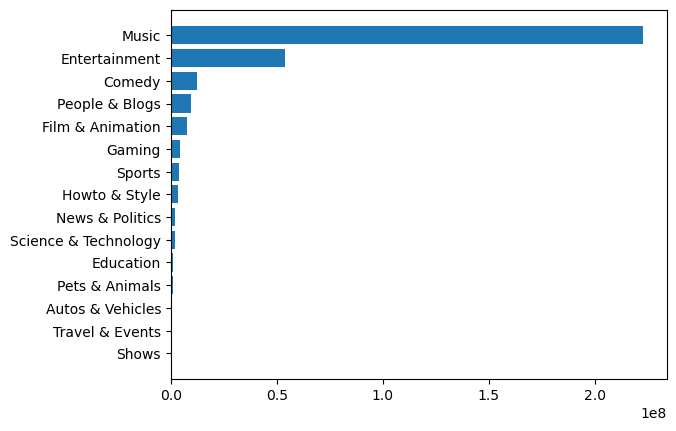

In [11]:
dislikedCategory = (
    listVideoId[["CategoryTitle", "likes", "video_id"]]
    .groupby("CategoryTitle")[["likes"]]
    .sum()
    .reset_index()
)
dislikedCategory.sort_values("likes", ascending=True, inplace=True)
plt.barh(dislikedCategory["CategoryTitle"], dislikedCategory["likes"])

## Pregunta 3
## ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Me gusta” / “No me
gusta”?

<BarContainer object of 15 artists>

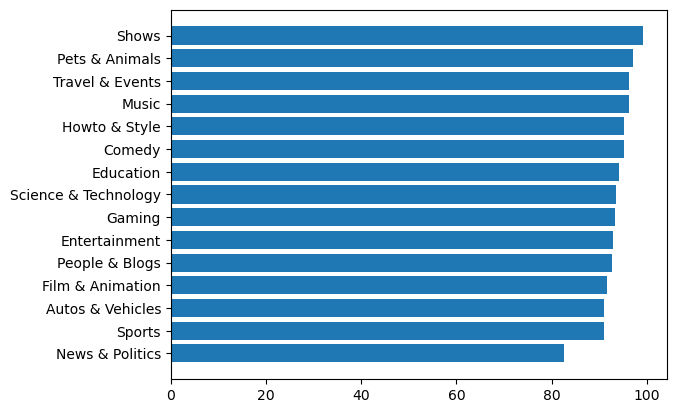

In [12]:
likedRCategory = (
    listVideoId[["CategoryTitle", "PercentageLikes", "video_id"]]
    .groupby("CategoryTitle")[["PercentageLikes"]]
    .mean()
    .reset_index()
)
likedRCategory.sort_values("PercentageLikes", ascending=True, inplace=True)
plt.barh(likedRCategory["CategoryTitle"], likedRCategory["PercentageLikes"])

<BarContainer object of 15 artists>

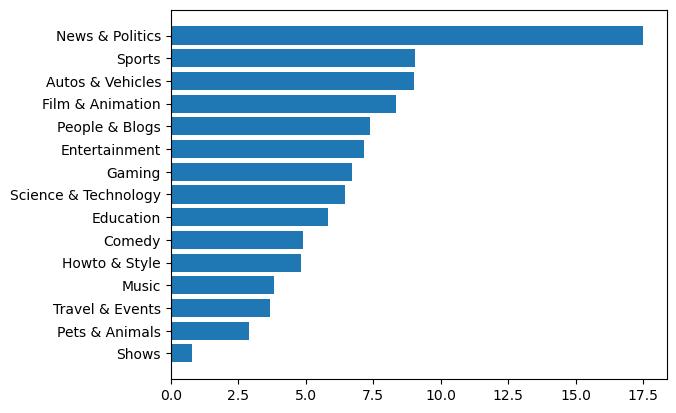

In [13]:
dislikedRCategory = (
    listVideoId[["CategoryTitle", "PercentageDislikes", "video_id"]]
    .groupby("CategoryTitle")[["PercentageDislikes"]]
    .mean()
    .reset_index()
)
dislikedRCategory.sort_values("PercentageDislikes", ascending=True, inplace=True)
plt.barh(dislikedRCategory["CategoryTitle"], dislikedRCategory["PercentageDislikes"])

## Pregunta 4
## ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas” / “Comentarios”?

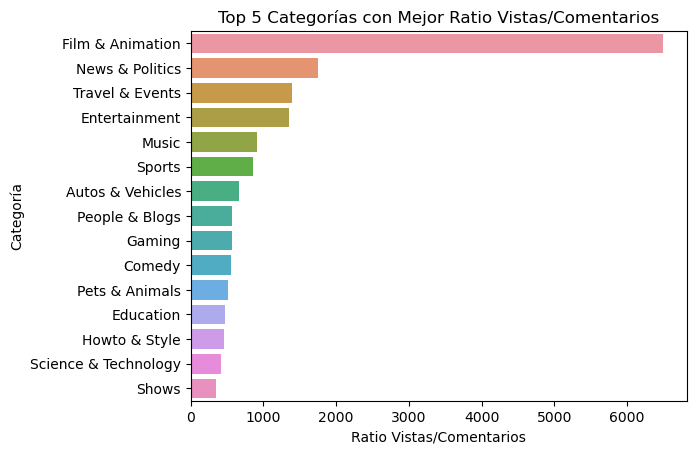

Top 5 categorías con mejor ratio vistas/comentarios:
CategoryTitle
Film & Animation    6496.652987
News & Politics     1743.877510
Travel & Events     1385.475217
Entertainment       1346.250208
Music                904.680089
Name: view_comment_ratio, dtype: float64


In [19]:
listVideoId = listVideoId[listVideoId['comments_disabled'] == False]

listVideoId['view_comment_ratio'] = listVideoId['views'] / (listVideoId['comment_count'] + 1)

ratio_vc = data.groupby('CategoryTitle')['view_comment_ratio'].mean().sort_values(ascending= False)

top_categories = ratio_vc

sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Top 5 Categorías con Mejor Ratio Vistas/Comentarios')
plt.xlabel('Ratio Vistas/Comentarios')
plt.ylabel('Categoría')
plt.show()

print("Top 5 categorías con mejor ratio vistas/comentarios:")
print(ratio_vc.head())

# Por el tiempo transcurrido

## Pregunta 5
## ¿Cómo ha cambiado el volumen de los videos en tendencia a lo largo del tiempo?

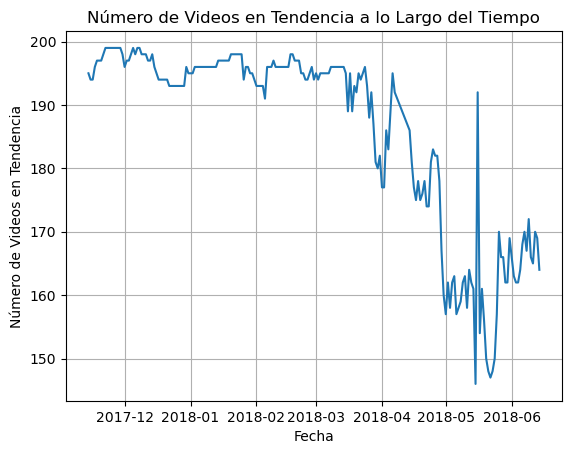

In [21]:
data['trending_date'] = pd.to_datetime(data['trending_date'])

tendencias_tiempo = data.groupby('trending_date').size()

plt.plot(tendencias_tiempo.index, tendencias_tiempo.values)
plt.title('Número de Videos en Tendencia a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de Videos en Tendencia')
plt.grid(True)
plt.show()

# Por canales de YouTube

## Pregunta 6
## ¿Qué Canales de YouTube son tendencia más frecuentemente? ¿Y cuáles con menos frecuencia?

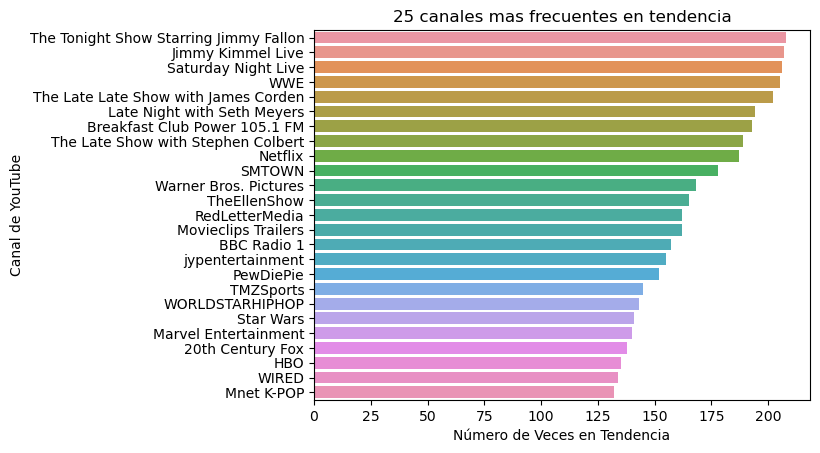

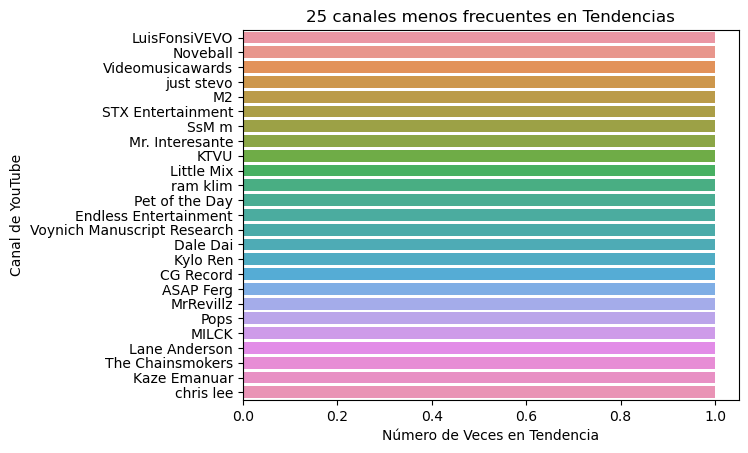

In [27]:
contador_canales = data['channel_title'].value_counts()

top_tendencias = contador_canales.head(25)

bottom_tendencias = contador_canales.tail(25)

sns.barplot(x=top_tendencias.values, y=top_tendencias.index)
plt.title('25 canales mas frecuentes en tendencia')
plt.xlabel('Número de Veces en Tendencia')
plt.ylabel('Canal de YouTube')
plt.show()

sns.barplot(x=bottom_tendencias.values, y=bottom_tendencias.index)
plt.title('25 canales menos frecuentes en Tendencias')
plt.xlabel('Número de Veces en Tendencia')
plt.ylabel('Canal de YouTube')
plt.show()

# Por la geografia del pais

## Pregunta 7
## ¿En qué Estados se presenta el mayor número de “Vistas”, “Me gusta” y “No me gusta”?

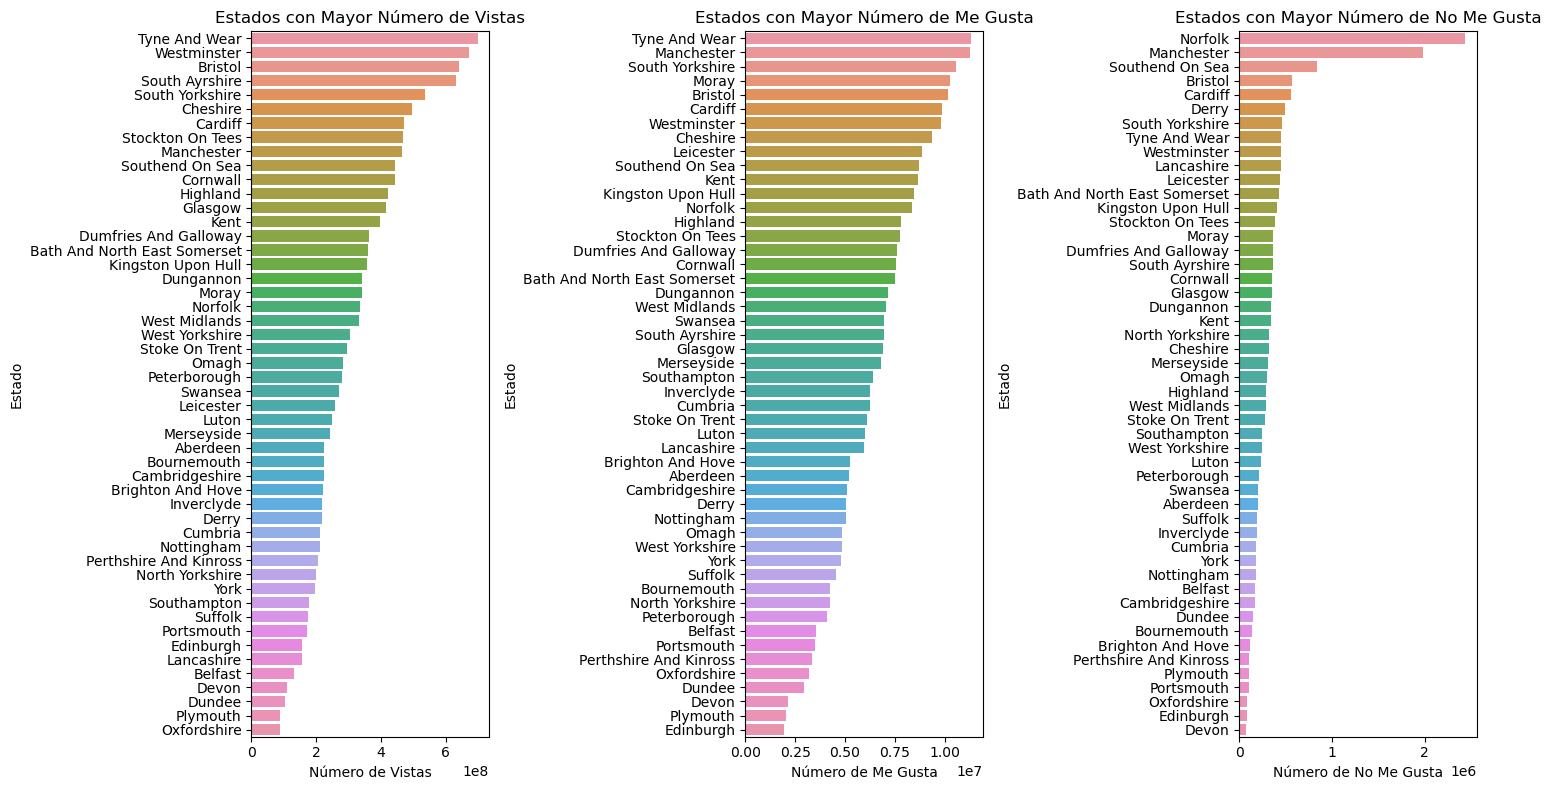

In [29]:
state_metrics = listVideoId.groupby('state')[['views', 'likes', 'dislikes']].sum()

top_views_states = state_metrics['views'].sort_values(ascending=False)
top_likes_states = state_metrics['likes'].sort_values(ascending=False)
top_dislikes_states = state_metrics['dislikes'].sort_values(ascending=False)

plt.figure(figsize=(15, 8))

plt.subplot(1, 3, 1)
sns.barplot(x=top_views_states, y=top_views_states.index)
plt.title('Estados con Mayor Número de Vistas')
plt.xlabel('Número de Vistas')
plt.ylabel('Estado')

plt.subplot(1, 3, 2)
sns.barplot(x=top_likes_states, y=top_likes_states.index)
plt.title('Estados con Mayor Número de Me Gusta')
plt.xlabel('Número de Me Gusta')
plt.ylabel('Estado')

plt.subplot(1, 3, 3)
sns.barplot(x=top_dislikes_states, y=top_dislikes_states.index)
plt.title('Estados con Mayor Número de No Me Gusta')
plt.xlabel('Número de No Me Gusta')
plt.ylabel('Estado')

plt.tight_layout()
plt.show()

# Preguntas Adicionales

## Pregunta 8
## ¿Es factible predecir el número de “Vistas” o “Me gusta” o “No me gusta”?

## Pregunta 9
## ¿Los videos en tendencia son los que mayor cantidad de comentarios positivos reciben?